# WeatherPy

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | flin flon
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ichnya
Processing Record 5 of Set 1 | crete
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | sao jose da coroa grande
Processing Record 10 of Set 1 | kourou
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | magadan
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | vorkuta
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | puerto nat

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,26.83,78,2,2.63,MU,1738794945
1,flin flon,54.7682,-101.8650,-17.09,66,75,3.09,CA,1738794946
2,port-aux-francais,-49.3500,70.2167,7.39,95,99,8.84,TF,1738794921
3,ichnya,50.8626,32.3942,-1.24,76,100,5.21,UA,1738794949
4,crete,35.1558,24.8950,3.92,65,82,4.96,GR,1738794950


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,26.83,78,2,2.63,MU,1738794945
1,flin flon,54.7682,-101.8650,-17.09,66,75,3.09,CA,1738794946
2,port-aux-francais,-49.3500,70.2167,7.39,95,99,8.84,TF,1738794921
3,ichnya,50.8626,32.3942,-1.24,76,100,5.21,UA,1738794949
4,crete,35.1558,24.8950,3.92,65,82,4.96,GR,1738794950


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

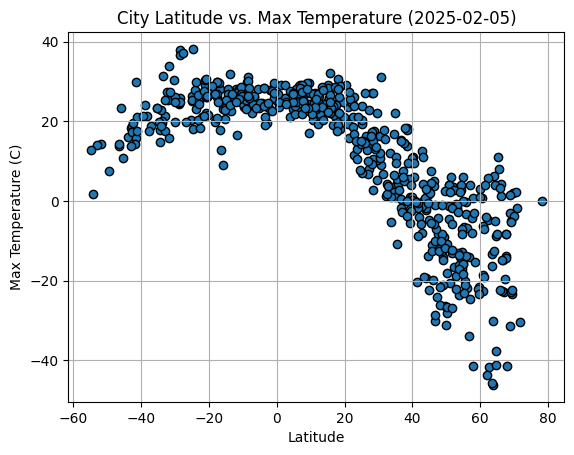

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2025-02-05)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

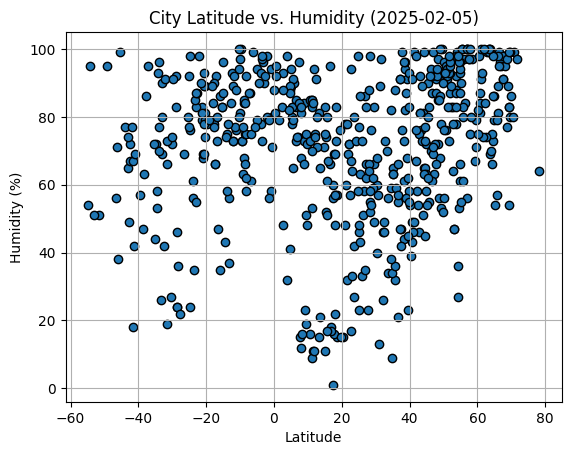

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2025-02-05)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

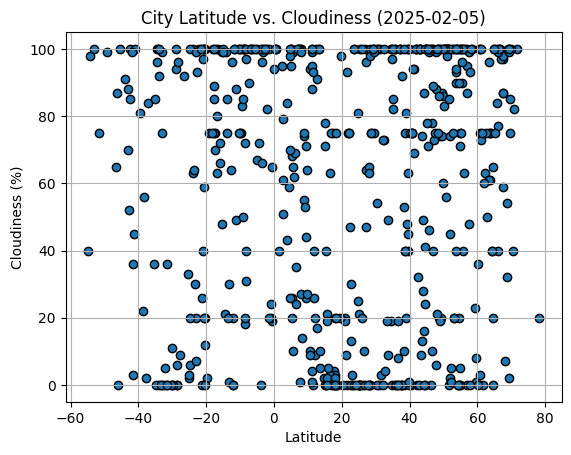

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2025-02-05)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

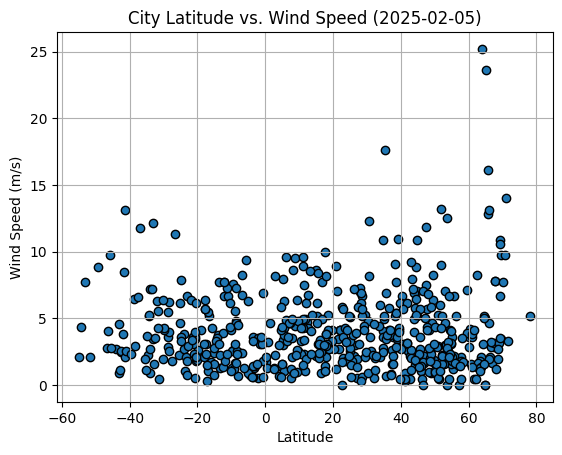

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2025-02-05)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title,textx,texty):
    """This function calculates the linear regression, generates plots and displays the R squared value"""
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

    plt.scatter(x_values,y_values) 
    plt.title(f'{sc_title}')
    plt.xlabel(f'{sc_xlabel}')
    plt.ylabel(f'{sc_ylabel}')
    
    # Plot regression line 
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq,(textx,texty),fontsize=15,color="red") 
    # Print r square value 
    print(f"R squared: {rvalue**2}") 


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flin flon,54.7682,-101.8650,-17.09,66,75,3.09,CA,1738794946
3,ichnya,50.8626,32.3942,-1.24,76,100,5.21,UA,1738794949
4,crete,35.1558,24.8950,3.92,65,82,4.96,GR,1738794950
5,tazovsky,67.4667,78.7000,-19.67,98,59,2.82,RU,1738794951
7,olonkinbyen,70.9221,-8.7187,-1.72,99,82,13.99,SJ,1738794953


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,26.83,78,2,2.63,MU,1738794945
2,port-aux-francais,-49.3500,70.2167,7.39,95,99,8.84,TF,1738794921
6,bredasdorp,-34.5322,20.0403,17.70,53,100,2.25,ZA,1738794952
8,sao jose da coroa grande,-8.8978,-35.1478,26.17,84,100,5.55,BR,1738794955
11,blackmans bay,-43.0167,147.3167,18.18,65,70,0.89,AU,1738794962


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6951236322375848


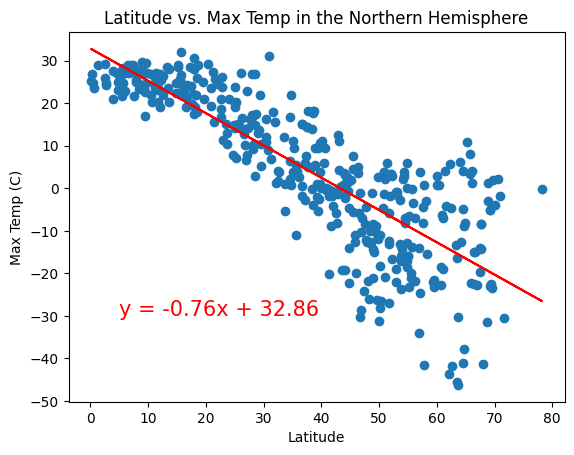

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
sc_xlabel = "Latitude"
sc_ylabel = "Max Temp (C)"
sc_title = "Latitude vs. Max Temp in the Northern Hemisphere"
textx = 5
texty = -30

linear_regression(x_values, y_values, sc_xlabel, sc_ylabel, sc_title, textx, texty)

plt.savefig("output_data/Fig5a.png")


R squared: 0.2347018915740157


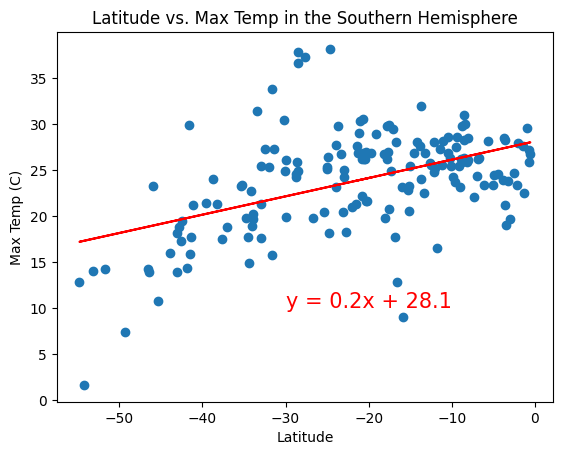

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
sc_xlabel = "Latitude"
sc_ylabel = "Max Temp (C)"
sc_title = "Latitude vs. Max Temp in the Southern Hemisphere"
textx = -30
texty = 10

linear_regression(x_values, y_values, sc_xlabel, sc_ylabel, sc_title, textx, texty)

plt.savefig("output_data/Fig5b.png")


**Discussion about the linear relationship:** 
There is a relatively strong inverse relationship between latitude and temperature in the Northern Hemisphere.
There is a very weak relationship between latitude and temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.12445807378549845


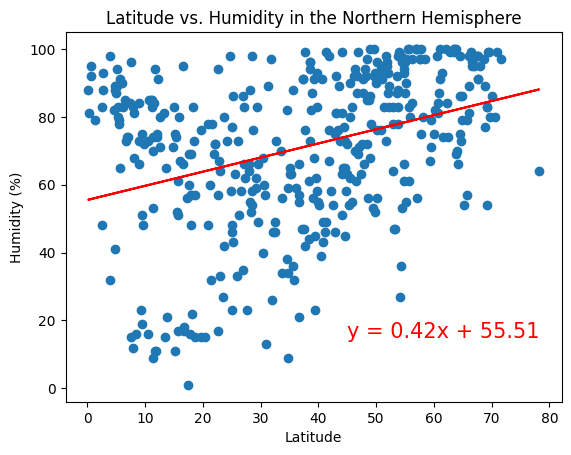

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
sc_xlabel = "Latitude"
sc_ylabel = "Humidity (%)"
sc_title = "Latitude vs. Humidity in the Northern Hemisphere"
textx = 45
texty = 15

linear_regression(x_values, y_values, sc_xlabel, sc_ylabel, sc_title, textx, texty)

plt.savefig("output_data/Fig6a.png")

R squared: 0.10704514393038483


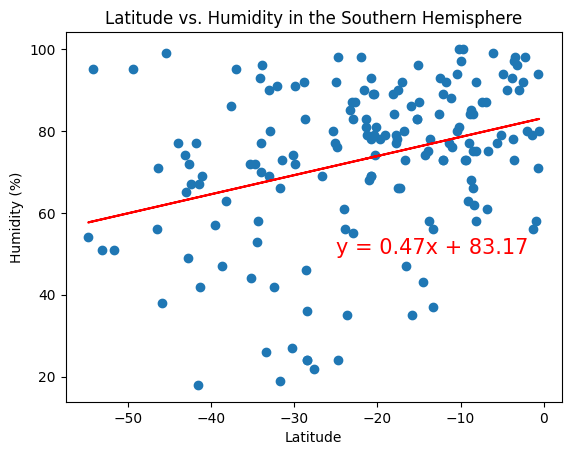

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
sc_xlabel = "Latitude"
sc_ylabel = "Humidity (%)"
sc_title = "Latitude vs. Humidity in the Southern Hemisphere"
textx = -25
texty = 50

linear_regression(x_values, y_values, sc_xlabel, sc_ylabel, sc_title, textx, texty)

plt.savefig("output_data/Fig6b.png")

**Discussion about the linear relationship:** 
There is a very weak relationship between latitude and humidity across both the Northern and Southern Hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.031719588898546376


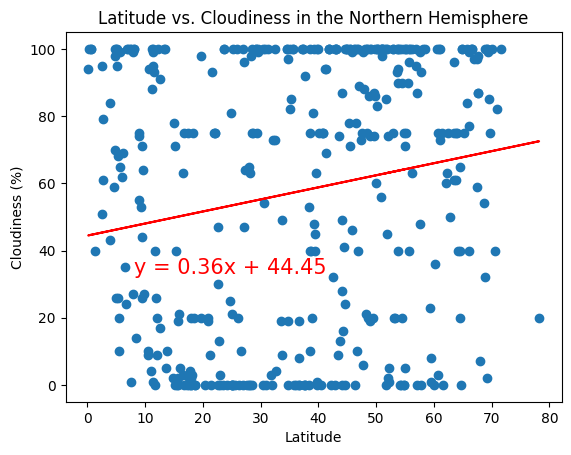

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
sc_xlabel = "Latitude"
sc_ylabel = "Cloudiness (%)"
sc_title = "Latitude vs. Cloudiness in the Northern Hemisphere"
textx = 8
texty = 33

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title,textx,texty)

plt.savefig("output_data/Fig7a.png")

R squared: 0.01977248143751482


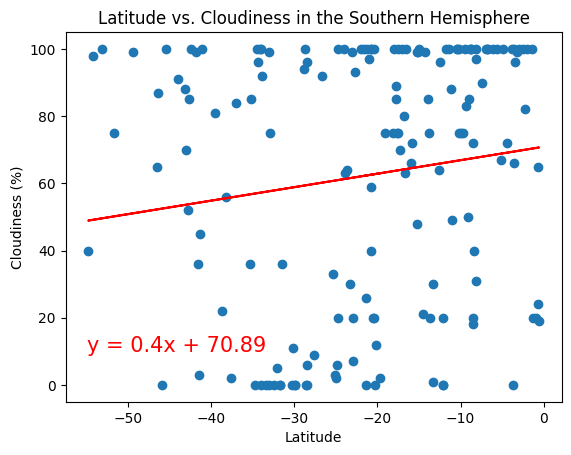

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
sc_xlabel = "Latitude"
sc_ylabel = "Cloudiness (%)"
sc_title = "Latitude vs. Cloudiness in the Southern Hemisphere"
textx = -55
texty = 10

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title,textx,texty)

plt.savefig("output_data/Fig7b.png")

**Discussion about the linear relationship:** 
There is a very weak relationship between latitude and cloudiness across both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0031343561532316735


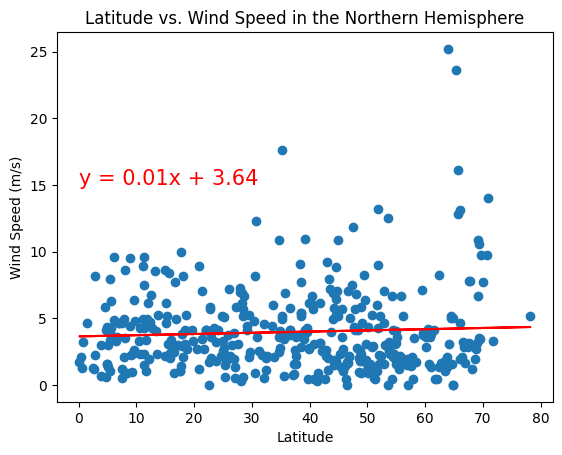

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
sc_xlabel = "Latitude"
sc_ylabel = "Wind Speed (m/s)"
sc_title = "Latitude vs. Wind Speed in the Northern Hemisphere"
textx = 0
texty = 15

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title,textx,texty)

plt.savefig("output_data/Fig8a.png")

R squared: 0.03611653900067586


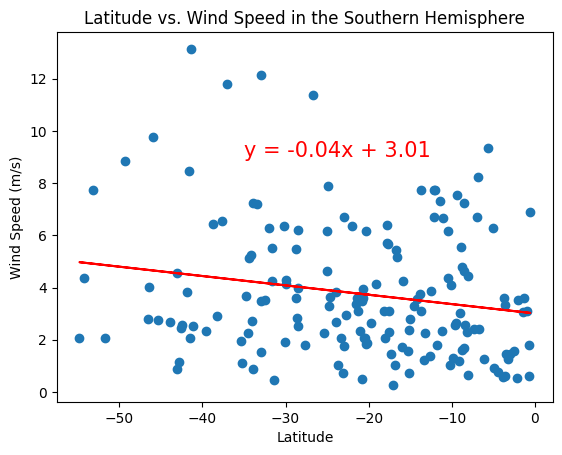

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
sc_xlabel = "Latitude"
sc_ylabel = "Wind Speed (m/s)"
sc_title = "Latitude vs. Wind Speed in the Southern Hemisphere"
textx = -35
texty = 9

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title,textx,texty)

plt.savefig("output_data/Fig8b.png")

**Discussion about the linear relationship:** 
There is a very weak relationship between latitude and wind speed across both the Northern and Southern Hemispheres.